<a href="https://colab.research.google.com/github/MSGanga/MSGanga/blob/main/Task7_Assignment_10_Glass_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## `Attribute Information:`

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
  * 1 building_windows_float_processed
  * 2 building_windows_non_float_processed
  * 3 vehicle_windows_float_processed
  * 4 vehicle_windows_non_float_processed (none in this database)
  * 5 containers
  * 6 tableware
  * 7 headlamps

In [161]:
# Importing the necessary Modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek 
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [162]:
# Loading the training dataset.
train_df = pd.read_csv("/content/trainKNN.txt", header=None, 
                 names=["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Glass_Type"])
train_df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [163]:
# Loading the testing dataset.
test_df = pd.read_csv("/content/testKNN.txt", header=None, 
                 names=["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Glass_Type"])
test_df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [164]:
# Checking the configuration of the DataFrames.
print(f"Training DataFrame has {train_df.shape[0]} rows & {train_df.shape[1]} columns.")
print(f"Testing DataFrame has {test_df.shape[0]} rows & {test_df.shape[1]} columns.")

Training DataFrame has 196 rows & 11 columns.
Testing DataFrame has 18 rows & 11 columns.


In [165]:
# Checking for missing values in training DataFrame
train_df.isnull().sum()

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass_Type    0
dtype: int64

In [166]:
# Checking for missing values in testing DataFrame
test_df.isnull().sum()

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass_Type    0
dtype: int64

In [167]:
# Id column	not required for our analysis. So, we can remove them from both training and testing DataFrame.
train_df.drop("Id", axis=1, inplace=True)
test_df.drop("Id", axis=1, inplace=True)

In [168]:
# Getting Information of the training DataFrame.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          196 non-null    float64
 1   Na          196 non-null    float64
 2   Mg          196 non-null    float64
 3   Al          196 non-null    float64
 4   Si          196 non-null    float64
 5   K           196 non-null    float64
 6   Ca          196 non-null    float64
 7   Ba          196 non-null    float64
 8   Fe          196 non-null    float64
 9   Glass_Type  196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.4 KB


In [169]:
# Getting Information of the testing DataFrame.
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          18 non-null     float64
 1   Na          18 non-null     float64
 2   Mg          18 non-null     float64
 3   Al          18 non-null     float64
 4   Si          18 non-null     float64
 5   K           18 non-null     float64
 6   Ca          18 non-null     float64
 7   Ba          18 non-null     float64
 8   Fe          18 non-null     float64
 9   Glass_Type  18 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 1.5 KB


In [170]:
# Checking for duplicate rows in training DataFrame.
train_df[train_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [171]:
# Checking for duplicate rows in testing DataFrame.
test_df[test_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type


In [172]:
# Removing the duplicate row from the training DataFrame.
train_df.drop_duplicates(keep='last',inplace=True)

In [173]:
# Checking the configuration of the DataFrames.
print(f"Training DataFrame has {train_df.shape[0]} rows & {train_df.shape[1]} columns.")
print(f"Testing DataFrame has {test_df.shape[0]} rows & {test_df.shape[1]} columns.")

Training DataFrame has 195 rows & 10 columns.
Testing DataFrame has 18 rows & 10 columns.


In [174]:
# Concatenating the training and testing DataFrame into single DataFrame df.
df = pd.concat([train_df, test_df])
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
13,1.51969,14.56,0.0,0.56,73.48,0.0,11.22,0.00,0.0,6
14,1.51115,17.38,0.0,0.34,75.41,0.0,6.65,0.00,0.0,6
15,1.52065,14.36,0.0,2.02,73.42,0.0,8.44,1.64,0.0,7
16,1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,7
17,1.51711,14.23,0.0,2.08,73.36,0.0,8.62,1.67,0.0,7


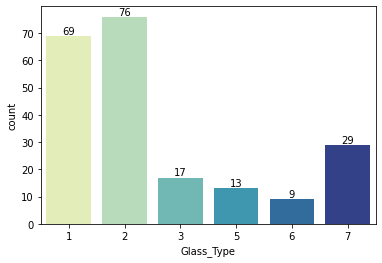

In [175]:
# Count of the target variable
cp=sns.countplot(x='Glass_Type', data=df, palette= 'YlGnBu' )
for i in cp.patches:
  cp.annotate(str(i.get_height()),xy=(i.get_x() + i.get_width() / 2, i.get_height()),
              ha='center', va='bottom')
plt.show()

In [176]:
# Count of values present in target column of training DataFrame.
target_count = Counter(train_df.Glass_Type)
target_count

Counter({1: 66, 2: 73, 3: 14, 5: 10, 6: 6, 7: 26})

In [177]:
# Count of values present in target column of testing DataFrame.
test_count =  Counter(test_df.Glass_Type)
test_count

Counter({1: 3, 2: 3, 3: 3, 5: 3, 6: 3, 7: 3})

In [178]:
# Seperating the Feature and Target Variables.
X_train = train_df.drop('Glass_Type',axis=1)
y_train = train_df["Glass_Type"]
X_test = test_df.drop('Glass_Type',axis=1)
y_test = test_df["Glass_Type"]

In [179]:
# Over-sampling using SMOTE and cleaning using Tomek links.
smt = SMOTETomek(sampling_strategy='all',random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)
print(f'Resampled dataset shape:\n{Counter(y_train_res)}')

Resampled dataset shape:
Counter({5: 73, 6: 73, 7: 73, 3: 70, 2: 68, 1: 67})


In [180]:
# Standardize features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [181]:
# User-defined function for KNN Classifier.
def knn_neighbours(n, p1):
    knn = KNeighborsClassifier(n_neighbors=n, p=p1) 

    # Train the model using the training sets
    knn.fit(X_train_res, y_train_res)

    # Predict the response for test dataset
    y_pred = knn.predict(X_test)

    return accuracy_score(y_test, y_pred)

In [182]:
# Accuracy scores for different number of neighbours for KNN Classifier with manhattan distance.
manhattan_dist = [knn_neighbours(i, 1) for i in range(3,14,2)]
print("Manhattan Distance:\n")
neighb = np.arange(3,14,2)
for k,j in zip(neighb,manhattan_dist):
  print(f"\tFor {k} neighbours, accuracy score = {j:.4f}")

Manhattan Distance:

	For 3 neighbours, accuracy score = 0.6667
	For 5 neighbours, accuracy score = 0.6667
	For 7 neighbours, accuracy score = 0.6667
	For 9 neighbours, accuracy score = 0.7222
	For 11 neighbours, accuracy score = 0.6111
	For 13 neighbours, accuracy score = 0.6667


In [183]:
# Accuracy scores for different number of neighbours for KNN Classifier with euclidean distance.
euclidean_dist = [knn_neighbours(i, 2) for i in range(3,14,2)]
print("Euclidean Distance:\n")
for k,j in zip(neighb,euclidean_dist):
  print(f"\tFor {k} neighbours, accuracy score = {j:.4f}")

Euclidean Distance:

	For 3 neighbours, accuracy score = 0.6667
	For 5 neighbours, accuracy score = 0.7222
	For 7 neighbours, accuracy score = 0.7222
	For 9 neighbours, accuracy score = 0.7222
	For 11 neighbours, accuracy score = 0.7222
	For 13 neighbours, accuracy score = 0.6111




---


Maximum accuracy for KNN Classifier with Manhattan distance is achieved at number of neighbors=9. 

Maximum accuracy for KNN Classifier with Euclidean distance is achieved at number of neighbors=5,7,9,11.

We shall take the common n_neighbors value for which accuracy is maximum.


---



In [184]:
# Create KNN Classifier with manhattan distance (for n_neighbors=9).
knn1 = KNeighborsClassifier(n_neighbors=9, p=1) # p=1 for manhattan distance

# Train the model using the training sets
knn1.fit(X_train_res, y_train_res)

# Predict the response for test dataset
y_pred1 = knn1.predict(X_test)

In [185]:
# Create KNN Classifier with euclidean distance (for n_neighbors=9).
knn2 = KNeighborsClassifier(n_neighbors=9, p=2) # p=2 for euclidean distance

# Train the model using the training sets
knn2.fit(X_train_res, y_train_res)

# Predict the response for test dataset
y_pred2 = knn2.predict(X_test)

In [186]:
# Confusion Matrix for KNN Classifier with manhattan distance(for n_neighbors=9).
confusion_matrix(y_test, y_pred1)

array([[3, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0],
       [0, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 3]])

In [187]:
# Confusion Matrix for KNN Classifier with euclidean distance(for n_neighbors=9).
confusion_matrix(y_test, y_pred2)

array([[3, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0],
       [0, 2, 1, 0, 0, 0],
       [0, 2, 0, 1, 0, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 3]])

In [188]:
# Classification Report for KNN Classifier with manhattan distance(for n_neighbors=9).
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.50      0.67      0.57         3
           3       1.00      0.33      0.50         3
           5       0.67      0.67      0.67         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3

    accuracy                           0.72        18
   macro avg       0.79      0.72      0.71        18
weighted avg       0.79      0.72      0.71        18



In [189]:
# Classification Report for KNN Classifier with euclidean distance(for n_neighbors=9).
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.33      0.67      0.44         3
           3       1.00      0.33      0.50         3
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.72        18
   macro avg       0.85      0.72      0.72        18
weighted avg       0.85      0.72      0.72        18



In [190]:
# Accuracy for KNN Classifier with manhattan distance(for n_neighbors=9).
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 72.22%


In [191]:
# Accuracy for KNN Classifier with euclidean distance(for n_neighbors=9).
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 72.22%


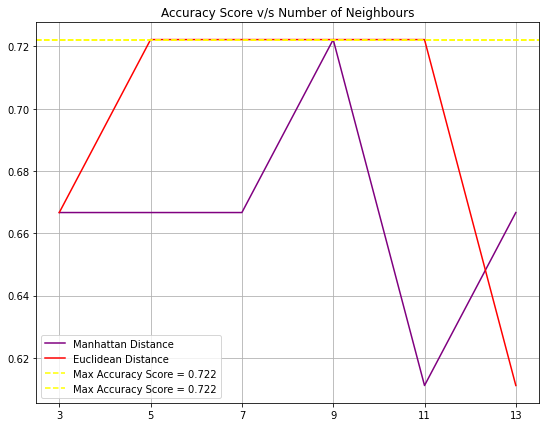

In [192]:
# Accuracy score v/s Number of Neighbours for Manhattan & Euclidean Distance.
plt.figure(figsize = (9,7))
plt.plot(np.arange(3,14,2),manhattan_dist, color="purple", label = "Manhattan Distance")
plt.plot(np.arange(3,14,2),euclidean_dist, color="red", label = "Euclidean Distance")
plt.title("Accuracy Score v/s Number of Neighbours")
plt.xticks(ticks = np.arange(3,14,2))
plt.axhline(max(manhattan_dist), color = "yellow",
            label=f"Max Accuracy Score = {max(manhattan_dist):.3f}", linestyle = "--")
plt.axhline(max(euclidean_dist), color = "yellow",
            label=f"Max Accuracy Score = {max(euclidean_dist):.3f}", linestyle = "--")
plt. legend()
plt.grid()
plt.show()



---


# **Conclusion**

From the Confusion Matrix, Classification Report and above plot, it's very clear that Euclidean Distance is giving better results. Even with number of neighbours = 5, KNN Classifier with Euclidean Distance was giving better results. But in case of KNN Classifier with Manhattan Distance, only when number of neighbours become 9, it's giving a better result. From the Confusion Matrix it is clear that, KNN Classifier with Euclidean Distance has overall more True Positives(TP) when compared to the other one. Also the f1-scores also seem to be comparitively better for KNN Classifier with Euclidean Distance.


---

